# Week1-A: Adder in Quantum Circuits

Hi! Welcome to our lab. This week, we will start by learning how to perform simple additions using quantum circuits.<br/>

Just like in classical computation, where you can combine different logical gates (e.g., AND, OR, XOR, etc.) to create binary adders, you can make adders with quantum circuits as well.

In [ ]:
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_bloch_multivector

# If you run this code outside IBM Quantum Experience,
# run the following commands to store your API token locally.
# Please refer https://qiskit.org/documentation/install.html#access-ibm-quantum-systems
IBMQ.save_account('MY_API_TOKEN')

# Loading your IBM Q account(s)
IBMQ.load_account()

## <span style="color: red; ">IMPORTANT: How to calculate Quantum Costs using an Unroller</span>
There are several ways to evaluate an efficiency of a program (quantum circuit). Such as:

1. Number of quantum bits
2. Depth
3. Program execution speed (Runtime)
4. Number of instructions

These are all important factors that impact the results and throughput of quantum computation. In this particular challenge, we will use the number of instructions to evaluate the efficiency of our program. We will call the number of instructions "cost" throughout this challenge and will use the following formula to evaluate the cost of a circuit.

Cost $=$ Single-qubit gates $+$ CX gates $\times 10$

Any given quantum circuit can be decomposed into single-qubit gates (an instruction given to a single qubit) and two-qubit gates. With the current Noisy Intermediate-Scale Quantum (NISQ) devices, CX gate error rates are generally 10x higher than a single qubit gate. Therefore, we will weigh CX gates 10 times more than a single-qubit gate for cost evaluation.

You can evaluate gate costs by yourself by using a program called "Unroller."
To elaborate on this, let's take a look at the example below.

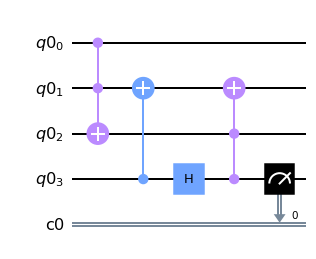

In [19]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, process_fidelity
q = QuantumRegister(4, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.cx(q[3], q[1])
qc.h(q[3])
qc.ccx(q[3], q[2], q[1])
qc.measure(q[3],c[0])
qc.draw(output='mpl')

In [20]:
qc.count_ops()

OrderedDict([('ccx', 2), ('cx', 1), ('h', 1), ('measure', 1)])

As you can see, this quantum circuit contains a Hadamard gate, a CX gate and CCX gates. By using qiskit.transpiler and importing PassManager, we can decompose this circuit into gates specified by the Unroller as shown below. In this case, into U3 gates and CX gates.

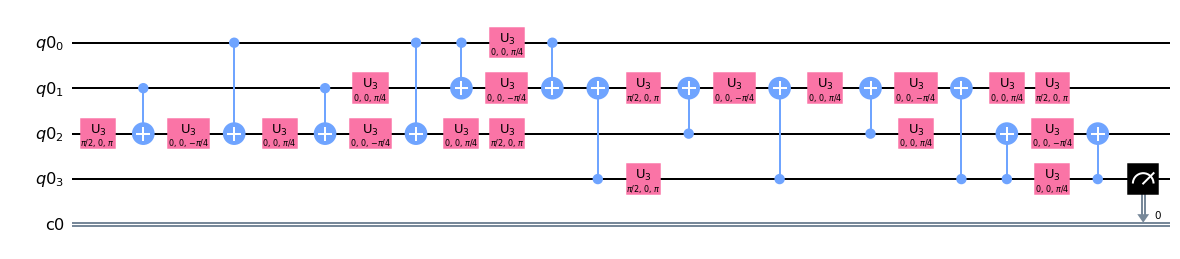

In [21]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [22]:
new_circuit.count_ops()

OrderedDict([('u3', 19), ('cx', 13), ('measure', 1)])

Thus, the cost of this circuit is $19+13\times10=149$.

You can easily check how any arbitrary gate can be decomposed by using the Unroller. So, if you are interested in how a particular two-qubit gate or three-qubit gate can be decomposed, we encourage you to try it yourself. In the example below, we used the Unroller to decompose a CCX gate into U3 gates and CX gates. 

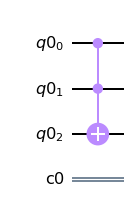

In [23]:
q = QuantumRegister(3, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.draw(output='mpl')

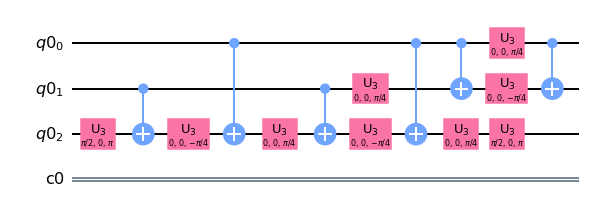

In [24]:
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [25]:
new_circuit.count_ops()

OrderedDict([('u3', 9), ('cx', 6)])

So, the total cost of a CCX gate can be calculated as $9+6\times10=69$.

# Learning Exercise I-A
The full adder takes two binary numbers plus an overflow bit, which we will call X, as its input.
Create a full adder with input data:

$A=1$, $B=0$, $X=1$
. 

The truth table for the full adder is given below.

|A(input)|B(input)|X(carry input)|S(sum)|C(carry out)|
|--|--|--|--|--|
|0|0|0|0|0|
|0|0|1|1|0|
|0|1|0|1|0|
|0|1|1|0|1|
|1|0|0|1|0|
|1|0|1|0|1|
|1|1|0|0|1|
|1|1|1|1|1|

Call your quantum register 'q' and classical register 'c'. Assign inputs A, B and X to q[0], q[1] and q[2] respectively, the sum output S to c[0] and carry output C to c[1].

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

##### build your quantum circuit here

# execute the circuit by qasm_simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

In [ ]:
# Check your answer using following code
from qc_grader import grade_ex1a
grade_ex1a(qc)

In [ ]:
# Submit your answer. You can re-submit at any time.
from qc_grader import submit_ex1a
submit_ex1a(qc)